# Polarization Jacobians

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import scipy.stats as ss
from scipy.integrate import trapz
import seaborn as sns

sns.set(context='notebook', palette='colorblind', style='ticks',
        font='serif', font_scale=1.5)

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

## Intensity amplitude and $\chi$

### Forward transformation

In [3]:
def inv_jac_Achi_to_Aep(e):
    j = 1/np.sqrt(1 + e**2)
    return j / trapz(j, e)

<Figure size 432x288 with 0 Axes>

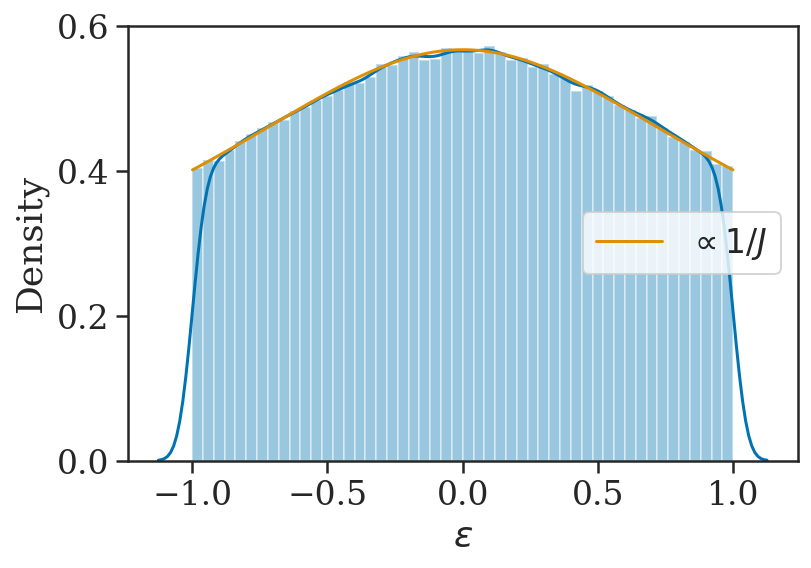

<Figure size 432x288 with 0 Axes>

In [4]:
N = 500000
rng = np.random.default_rng(12345)

# draw uniformly in the original quantities
Ahatmax = np.sqrt(2)
Ahat = rng.uniform(0, Ahatmax, N)
chi = rng.uniform(-np.pi/4, np.pi/4, N)

# transform into A, ellipticity
A = Ahat*np.cos(chi)
e = np.tan(chi)

# plot distribution and Jacobian

Amax = Ahatmax/np.sqrt(2)
sns.distplot(e[A<=Amax])

es = np.linspace(-0.999, 0.999, 100)
plt.plot(es, inv_jac_Achi_to_Aep(es), label=r'$\propto 1/J$')
plt.legend();
plt.xlabel(r'$\epsilon$');
plt.figure()

In [147]:
# Nplot = -1
# g = sns.jointplot(A[:Nplot], e[:Nplot], kind='hex', joint_kws=dict(rasterized=True, alpha=0.9, lw=0, gridsize=70),)
# #                   fill=True, xlim=(0, max(A)), ylim=(-1,1), bw_method=0.22)
# g.ax_joint.set_xlabel(r'$A/A_{\rm max}$')
# g.ax_joint.set_ylabel(r'$\epsilon$');

# g.ax_joint.set_yticks([-1, -0.5, 0, 0.5, 1])

# lkws = dict(c='0.7', ls='--', lw=3)
# g.ax_joint.axvline(Amax, **lkws);
# g.ax_marg_x.axvline(Amax, **lkws);

# # g.ax_joint.tick_params(direction='in')

# axins = g.ax_joint.inset_axes([0.1, 0.18, 0.47, 0.25])
# axins.tick_params(labelsize=8, #direction='in', 
#                   labelcolor='w', color='w', length=3)

# sns.histplot(e[A<=Amax], ax=axins, stat='density',
#              color='w')

# es = np.linspace(-0.999, 0.999, 100)
# axins.plot(es, inv_jac_Achi_to_Aep(es),
#            c=sns.color_palette()[1],
#            label=r'$\propto 1/J$',
#           lw=3)
# axins.set_xlabel(r'$\epsilon_{[A < A_{\rm max}]}$', color='w')
# axins.set_ylabel(None);
# axins.set_yticks([]);
# axins.patch.set_alpha(0.1);
# for k in ['top', 'right', 'left']:
#     axins.spines[k].set_visible(False)
# axins.spines['bottom'].set_color('w')
# axins.legend(fontsize=10, frameon=False, labelcolor='0.4', loc='lower right',
#              handlelength=1, handletextpad=0.5);

# g.ax_joint.annotate(r"$A=A_\mathrm{max}$",
#             xy=(Amax, 1), xycoords='data', rotation=90,
#             xytext=(-2, -3), textcoords='offset points',
#             horizontalalignment='right', verticalalignment='top',
#             color=lkws['c']);
# plt.savefig("jac_Aeps_Achi.pdf", bbox_inches='tight')

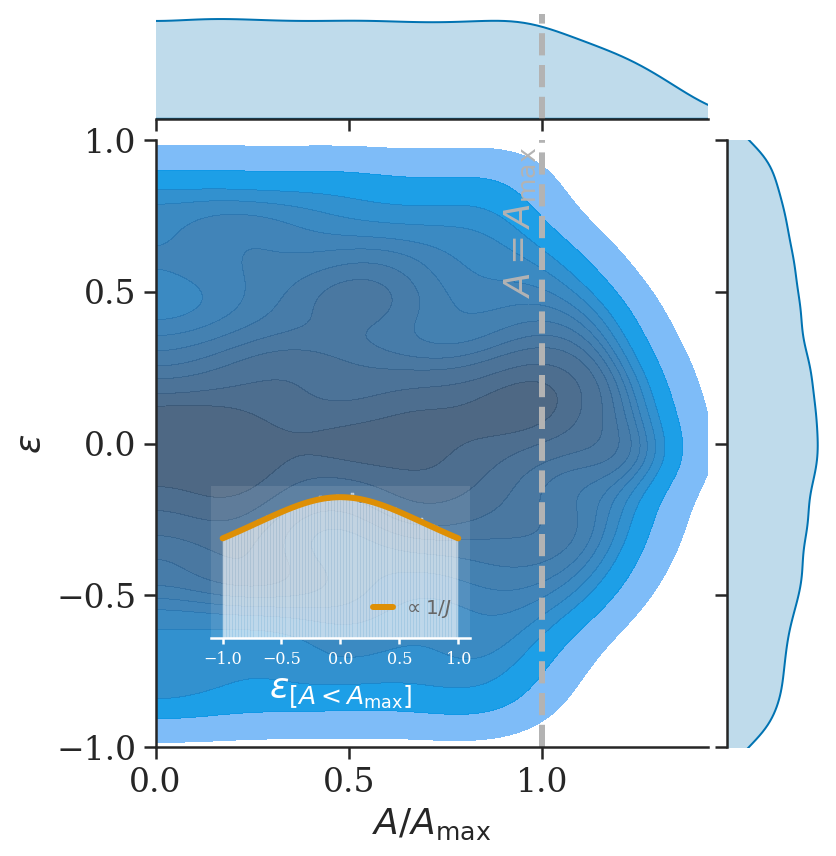

In [146]:
Nplot = 20000

ix = rng.choice(len(A), min(Nplot, len(A)), replace=False)
x = np.concatenate((A[ix], -A[ix]))
y = np.concatenate((e[ix], e[ix]))

g = sns.jointplot(x=x, y=y, xlim=(0, max(A)*1.01), ylim=(-1,1), kind='kde',
                  joint_kws=dict(clip=((0,2), (-1,1)), levels=12, fill=True, alpha=0.9))

g.ax_joint.set_xlabel(r'$A/A_{\rm max}$')
g.ax_joint.set_ylabel(r'$\epsilon$');

g.ax_joint.set_yticks([-1, -0.5, 0, 0.5, 1])

lkws = dict(c='0.7', ls='--', lw=3)
g.ax_joint.axvline(Amax, **lkws);
g.ax_marg_x.axvline(Amax, **lkws);

# g.ax_joint.tick_params(direction='in')

axins = g.ax_joint.inset_axes([0.1, 0.18, 0.47, 0.25])
axins.tick_params(labelsize=8, #direction='in', 
                  labelcolor='w', color='w', length=3)

sns.histplot(e[A<=Amax], ax=axins, stat='density',
             color='w', alpha=0.5)

es = np.linspace(-0.999, 0.999, 100)
axins.plot(es, inv_jac_Achi_to_Aep(es),
           c=sns.color_palette()[1],
           label=r'$\propto 1/J$',
          lw=3)
axins.set_xlabel(r'$\epsilon_{[A < A_{\rm max}]}$', color='w')
axins.set_ylabel(None);
axins.set_yticks([]);
axins.patch.set_alpha(0.1);
for k in ['top', 'right', 'left']:
    axins.spines[k].set_visible(False)
axins.spines['bottom'].set_color('w')
axins.legend(fontsize=10, frameon=False, labelcolor='0.4', loc='lower right',
             handlelength=1, handletextpad=0.5);

# sns.despine(g.ax_joint.figure)
g.ax_joint.annotate(r"$A=A_\mathrm{max}$",
            xy=(Amax, 1), xycoords='data', rotation=90,
            xytext=(-2, -3), textcoords='offset points',
            horizontalalignment='right', verticalalignment='top',
            color=lkws['c']);
plt.savefig("jac_Aeps_Achi.pdf", bbox_inches='tight')

### Backward transformation

In [71]:
def inv_jac_Aep_to_Achi(chi):
    j = 1/np.cos(chi)
    return j / trapz(j, chi)

<Figure size 432x288 with 0 Axes>

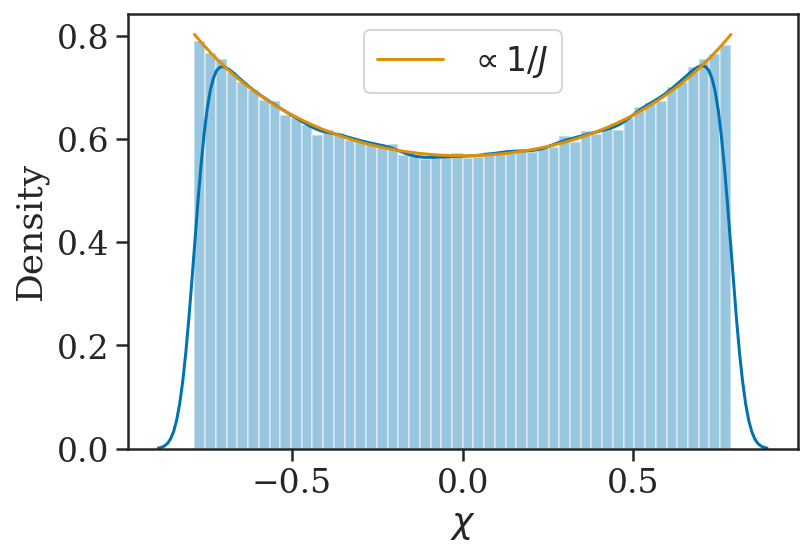

<Figure size 432x288 with 0 Axes>

In [74]:
N = 500000
rng = np.random.default_rng(12345)

# draw uniformly in the original quantities
Amax = 1
A = rng.uniform(0, 1, N)
e = rng.uniform(-1, 1, N)

# transform into A, ellipticity
Ahat = A/np.cos(chi)
chi = np.arctan(e)

# plot distribution and Jacobian

Ahatmax = 1#Amax*np.sqrt(2)
sns.distplot(chi[Ahat<=Ahatmax])

chis = np.linspace(-np.pi/4, np.pi/4, 100)
plt.plot(chis, inv_jac_Aep_to_Achi(chis), label=r'$\propto 1/J$')
plt.legend();
plt.xlabel(r'$\chi$');
plt.figure()

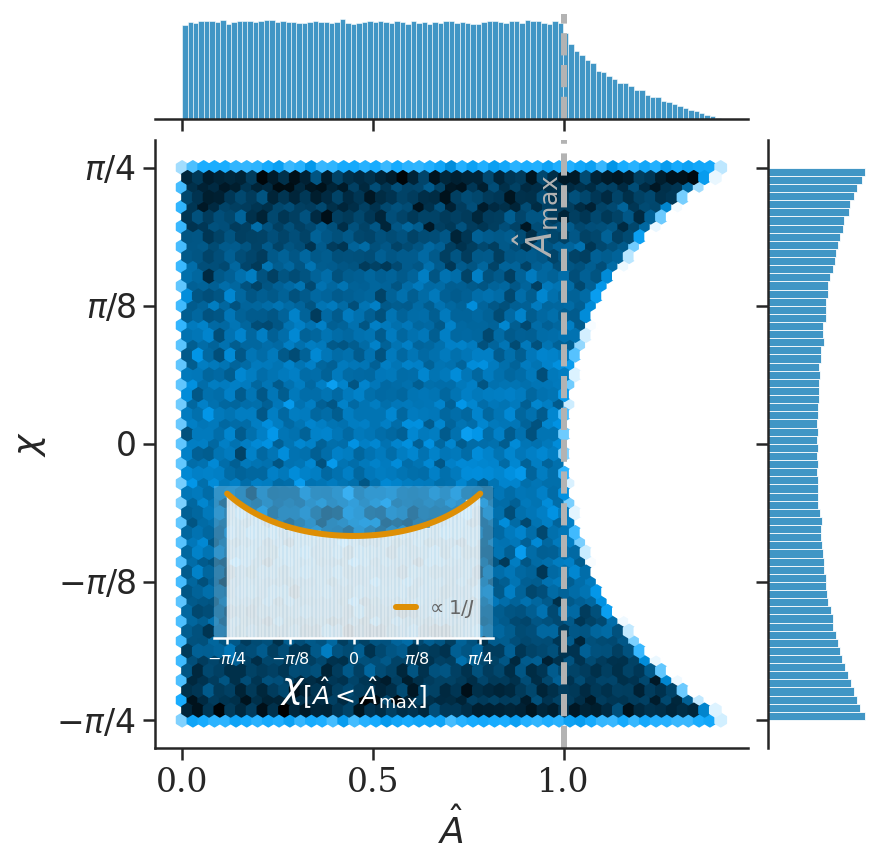

In [89]:
Nplot = -1
g = sns.jointplot(Ahat[:Nplot], chi[:Nplot], kind='hex')
g.ax_joint.set_xlabel(r'$\hat{A}$')
g.ax_joint.set_ylabel(r'$\chi$');

g.ax_joint.set_yticks([-np.pi/4, -np.pi/8, 0, np.pi/8, np.pi/4])
g.ax_joint.set_yticklabels([r'$-\pi/4$', r'$-\pi/8$', r'$0$', r'$\pi/8$',r'$\pi/4$']);

lkws = dict(c='0.7', ls='--', lw=3)
g.ax_joint.axvline(Ahatmax, **lkws);
g.ax_marg_x.axvline(Ahatmax, **lkws);

# g.ax_joint.tick_params(direction='in')

axins = g.ax_joint.inset_axes([0.1, 0.18, 0.47, 0.25])
axins.set_xticks(g.ax_joint.get_yticks())
axins.set_xticklabels(g.ax_joint.get_yticklabels())
axins.tick_params(labelsize=8, #direction='in', 
                  labelcolor='w', color='w', length=3)

sns.histplot(chi[Ahat<=Ahatmax], ax=axins, stat='density',
             color='w')

axins.plot(chis, inv_jac_Aep_to_Achi(chis),
           c=sns.color_palette()[1],
           label=r'$\propto 1/J$',
          lw=3)
axins.set_xlabel(r'$\chi_{[\hat{A} < \hat{A}_{\rm max}]}$', color='w')
axins.set_ylabel(None);
axins.set_yticks([]);
axins.patch.set_alpha(0.2);
for k in ['top', 'right', 'left']:
    axins.spines[k].set_visible(False)
axins.spines['bottom'].set_color('w')
axins.legend(fontsize=10, frameon=False, labelcolor='0.4', loc='lower right',
             handlelength=1, handletextpad=0.5);

g.ax_joint.annotate(r"$\hat{A}_\mathrm{max}$",
            xy=(Ahatmax, np.pi/4), xycoords='data', rotation=90,
            xytext=(-2, -3), textcoords='offset points',
            horizontalalignment='right', verticalalignment='top',
            color=lkws['c']);

## Linear in quadratures

In [3]:
def jac_e(e):
    j = 1-e**2
    return j / trapz(j, e)

def jac_A(A):
    j = A**3
    return j / trapz(j, A)

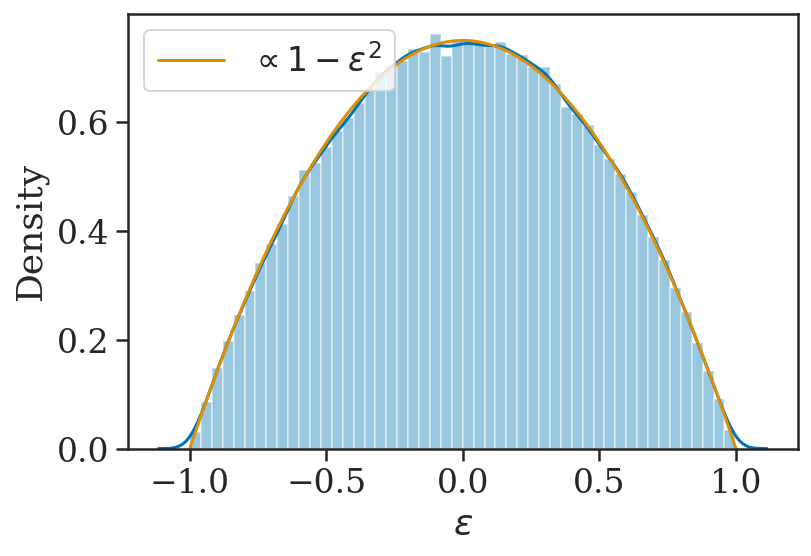

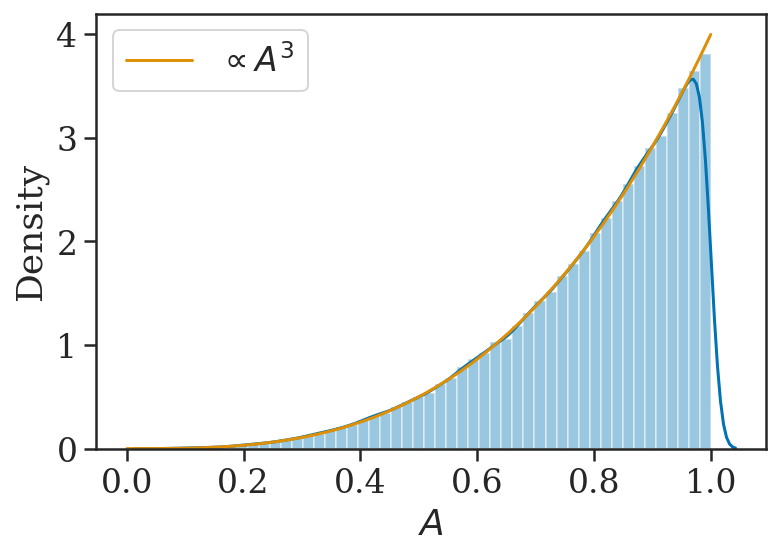

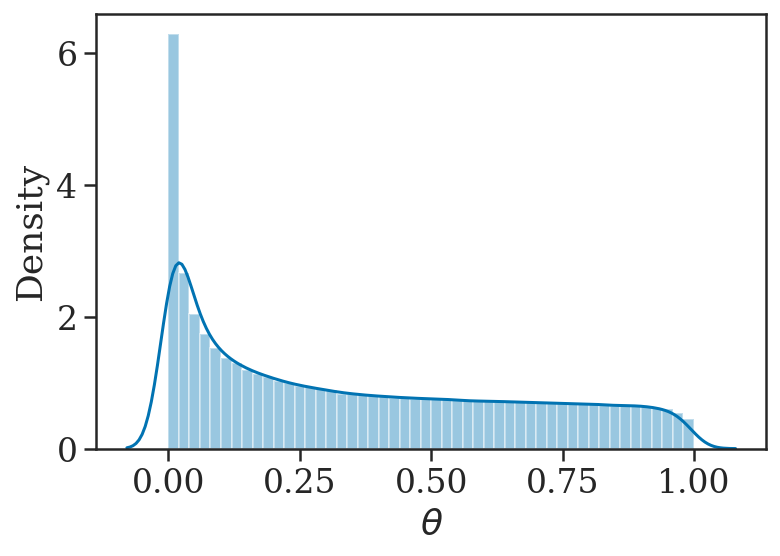

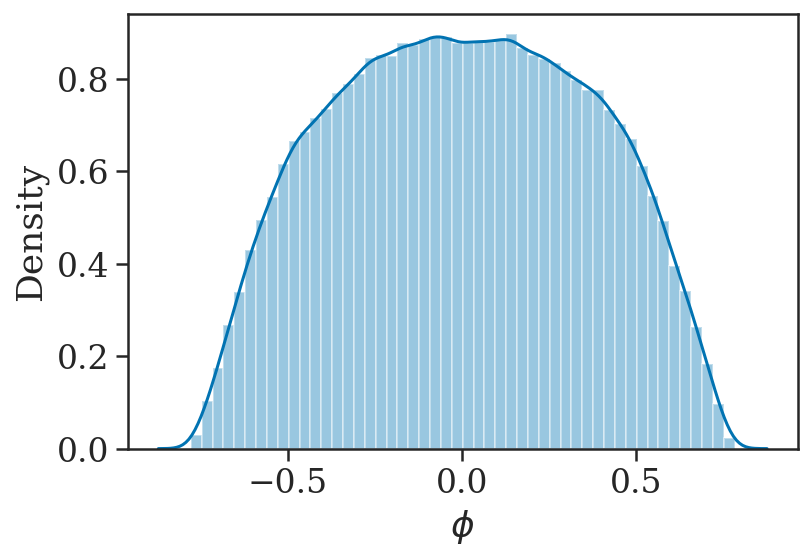

In [4]:
N = 500000
Apx = Ap_x = random.uniform(-1, 1, N)
Apy = Ap_y = random.uniform(-1, 1, N)
Acx = Ac_x = random.uniform(-1, 1, N)
Acy = Ac_y = random.uniform(-1, 1, N)

# r = linalg.norm([Apx, Apy, Acy, Acy], axis=0)

A = 0.5*(sqrt((Ac_y + Ap_x)**2 + (Ac_x - Ap_y)**2) + sqrt((Ac_y - Ap_x)**2 + (Ac_x + Ap_y)**2))
e = (sqrt((Ac_y + Ap_x)**2 + (Ac_x - Ap_y)**2) -  sqrt((Ac_y - Ap_x)**2 + (Ac_x + Ap_y)**2))/(sqrt((Ac_y + Ap_x)**2 + (Ac_x - Ap_y)**2) +  sqrt((Ac_y - Ap_x)**2 + (Ac_x + Ap_y)**2))
theta = (-arctan(-Ac_x - Ap_y, -Ac_y + Ap_x) -  arctan(-Ac_x + Ap_y, Ac_y + Ap_x))/2.
phi = (-arctan(-Ac_x - Ap_y, -Ac_y + Ap_x) + arctan(-Ac_x + Ap_y, Ac_y + Ap_x))/2.

Amax = 1

sns.distplot(e[A < Amax])

es = linspace(-0.999, 0.999, 100)
plot(es, jac_e(es), label=r'$\propto 1-\epsilon^2$')
legend();
xlabel(r'$\epsilon$');
figure()

sns.distplot(A[A < Amax])
As = linspace(0, Amax, 50)
plot(As, jac_A(As), label=r'$\propto A^3$')
xlabel(r'$A$');
legend();
figure()

sns.distplot(sin(2*theta[A < Amax])**2)
xlabel(r'$\theta$');
figure()

sns.distplot(phi[A < Amax])
xlabel(r'$\phi$');

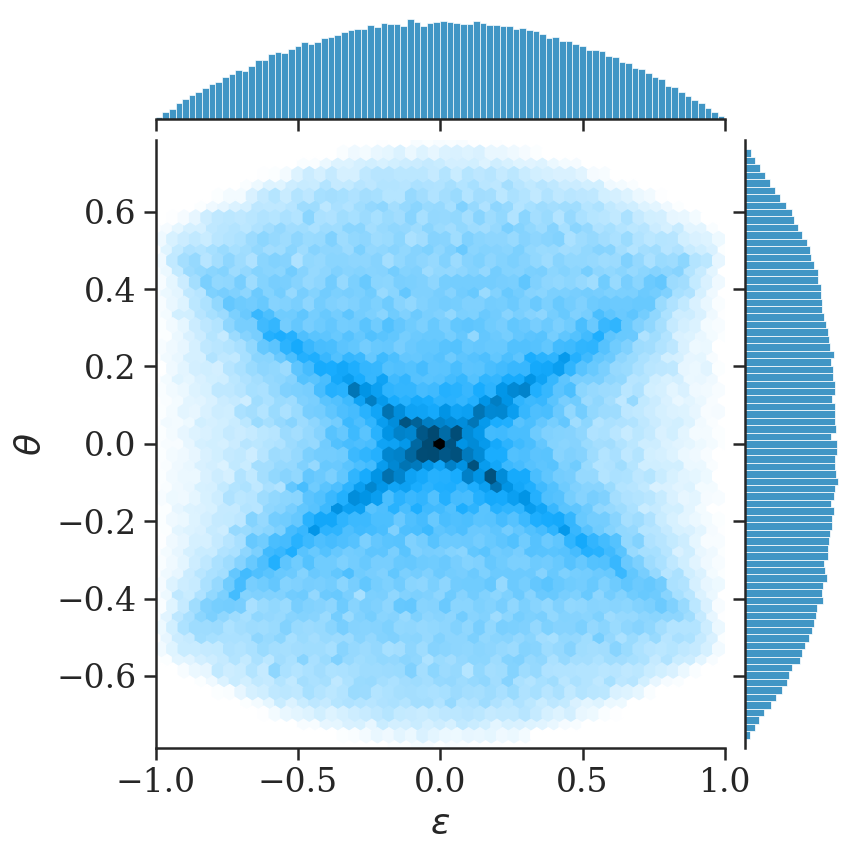

In [5]:
g = sns.jointplot(e[A < Amax], theta[A < Amax], kind='hex',
                  xlim=(-1,1), ylim=(-pi/4,pi/4))
g.ax_joint.set_xlabel(r'$\epsilon$');
g.ax_joint.set_ylabel(r'$\theta$');

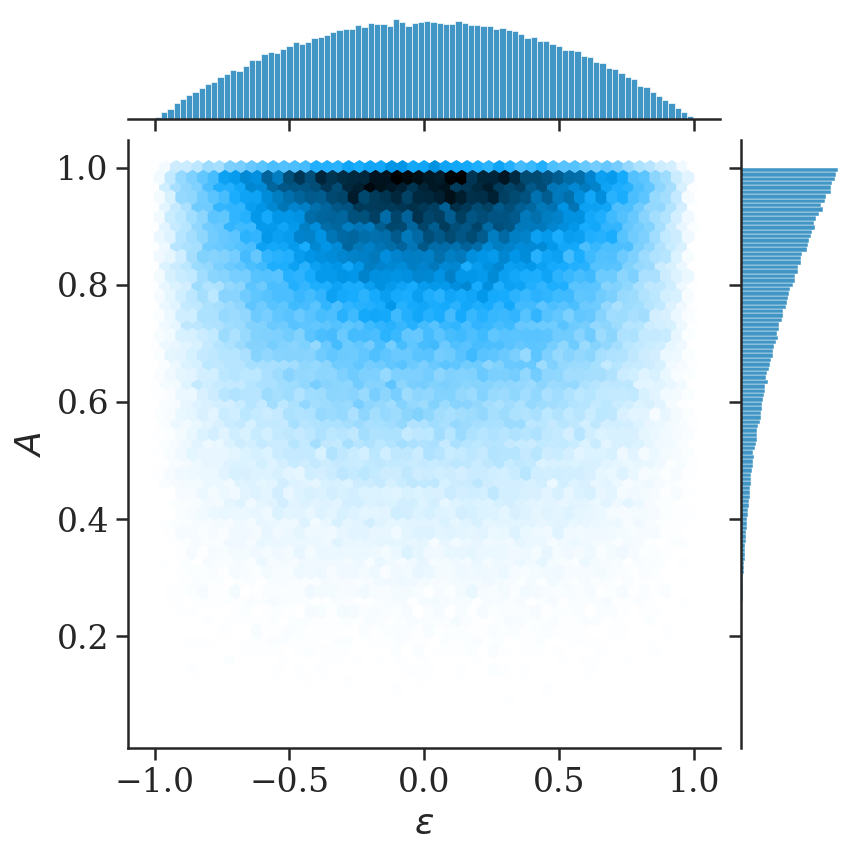

In [6]:
g = sns.jointplot(e[A < Amax], A[A < Amax], kind='hex')
g.ax_joint.set_xlabel(r'$\epsilon$');
g.ax_joint.set_ylabel(r'$A$');

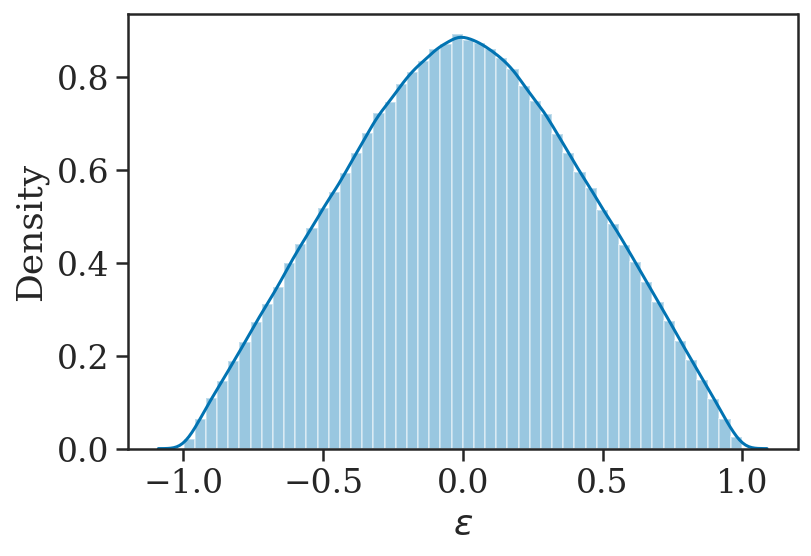

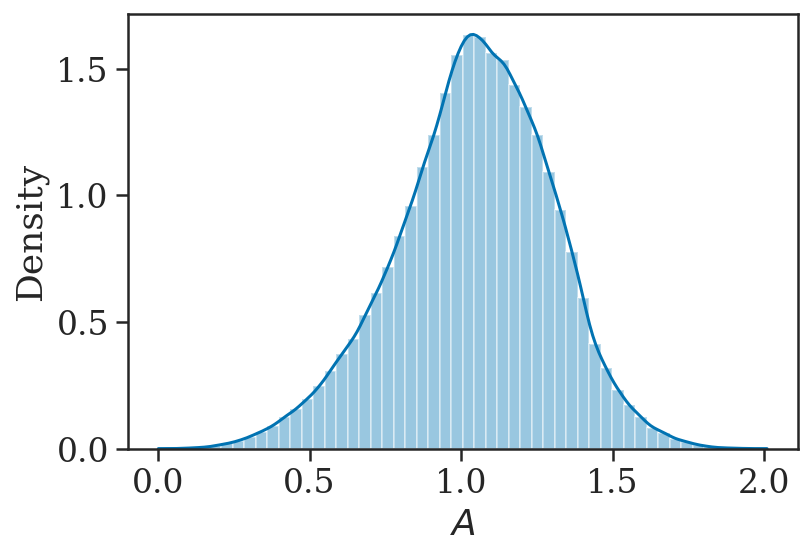

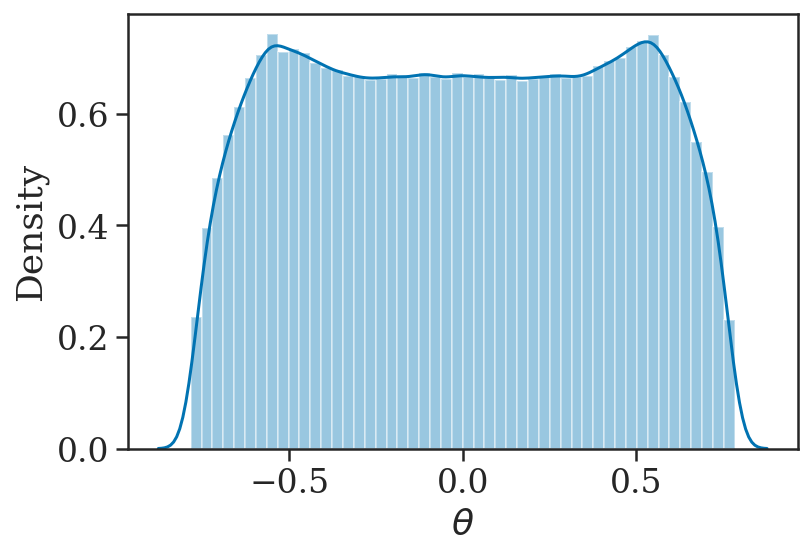

In [7]:
sns.distplot(e)
xlabel(r'$\epsilon$');
figure()

sns.distplot(A)
xlabel(r'$A$');
figure()

sns.distplot(theta)
xlabel(r'$\theta$');

<AxesSubplot:ylabel='Density'>

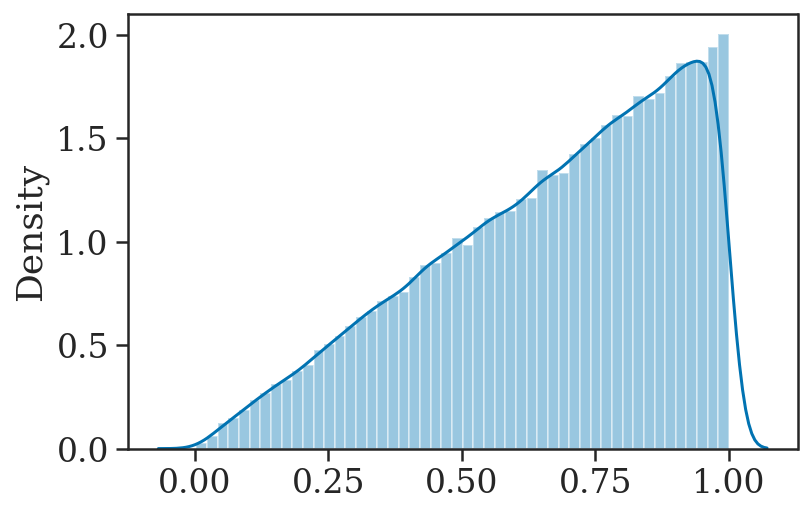

In [8]:
N = 500000
x = random.uniform(-2, 2, N)
y = random.uniform(-2, 2, N)
r = sqrt(x**2 + y**2)

rs = linspace(0, 0.999, 1000)
sns.distplot(r[r<1])

In [9]:
J = 2/(sqrt((Acy + Apx)**2 + (Acx - Apy)**2) * sqrt((Acy - Apx)**2 + (Acx + Apy)**2)* (sqrt((Acy + Apx)**2 + (Acx - Apy)**2) + sqrt((Acy - Apx)**2 + (Acx + Apy)**2)))

## Linear polarizations

In [10]:
# Sqrt((1 + \[Epsilon]**2)**2/(-1 + \[Epsilon]**2)**2 - cos(2*\[Theta])**2)/(2.*A)

def jac_e_ApAc(e, cos2th2=0):
    j = 1/sqrt((1 + e**2)**2/(-1 + e**2)**2 - cos2th2)
    return j / trapz(j, e)

def jac_A_ApAc(A):
    j = (2.*A)
    return j / trapz(j, A)

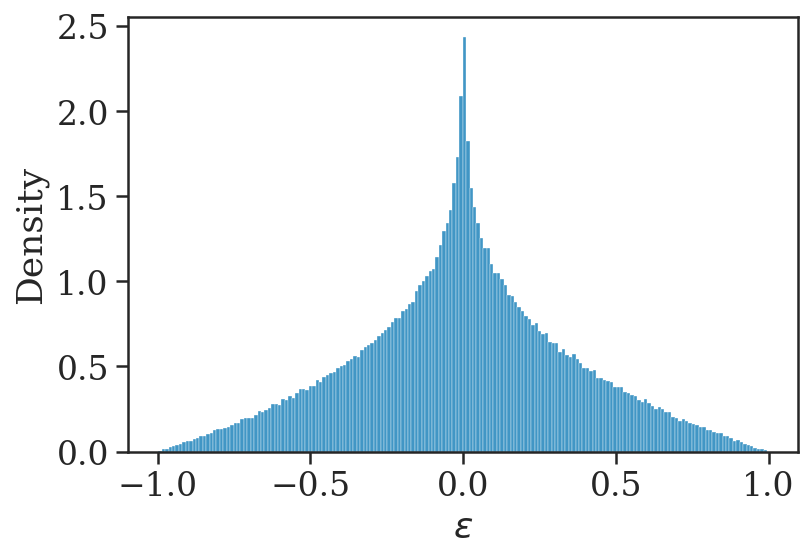

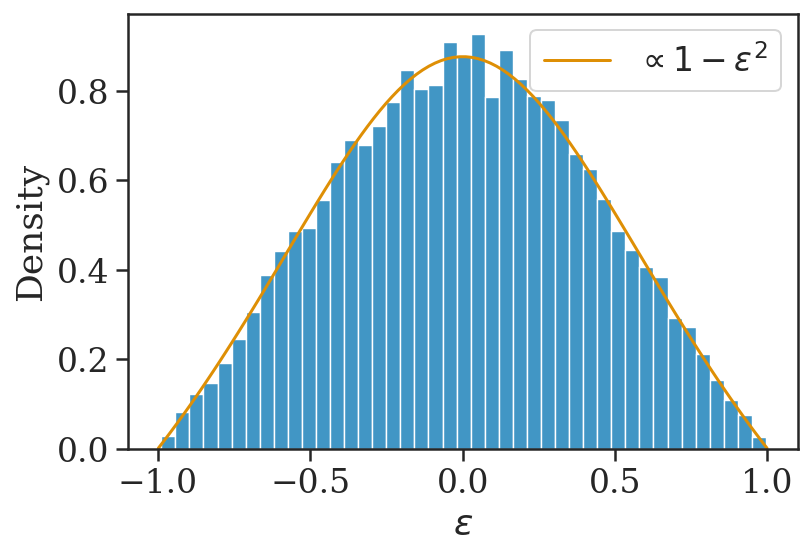

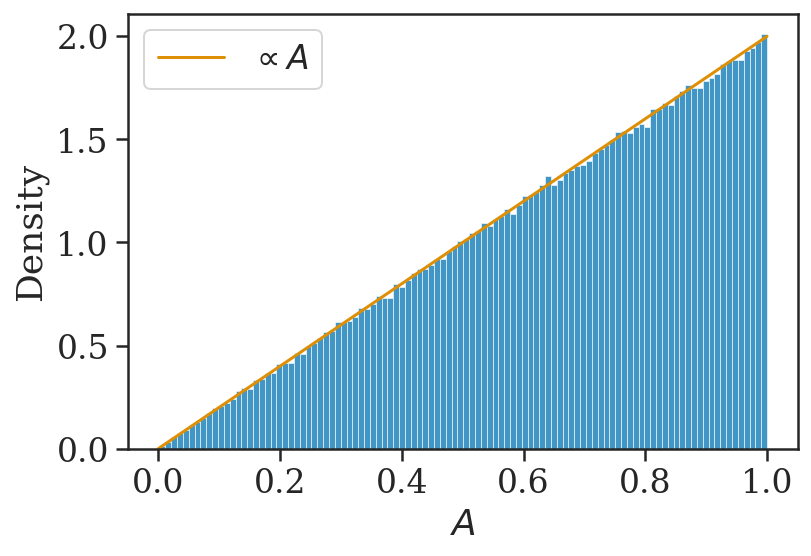

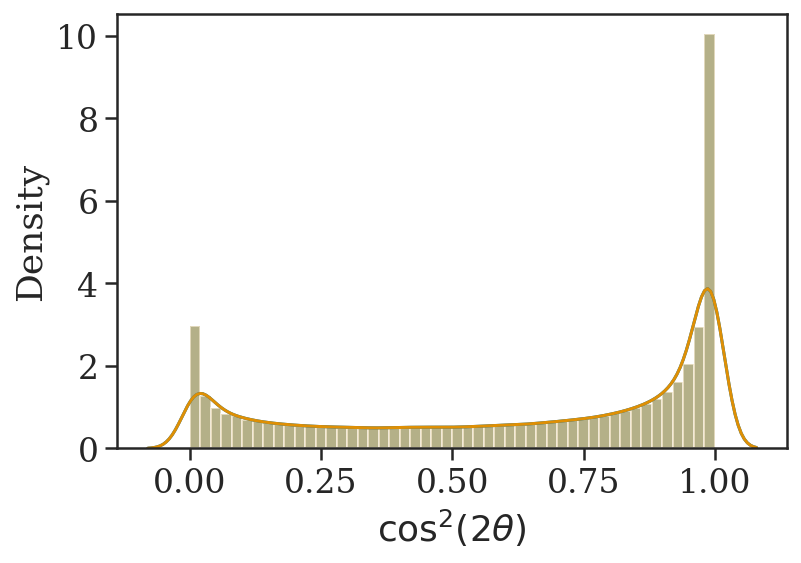

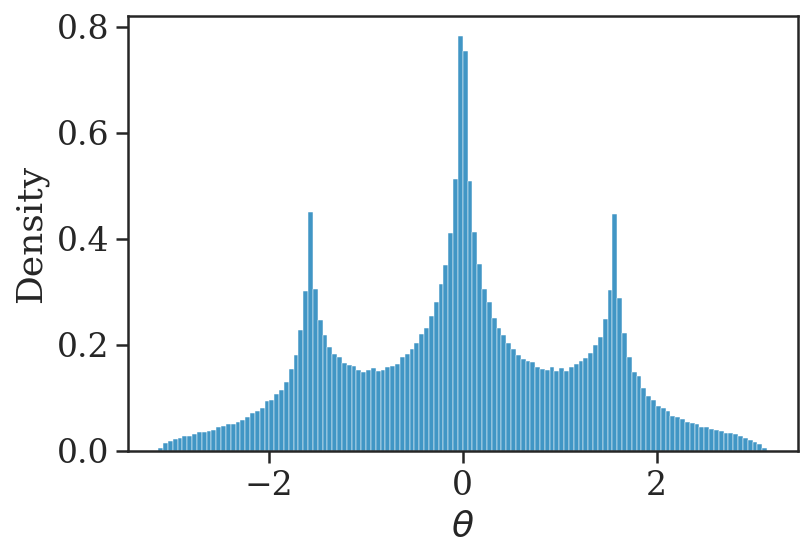

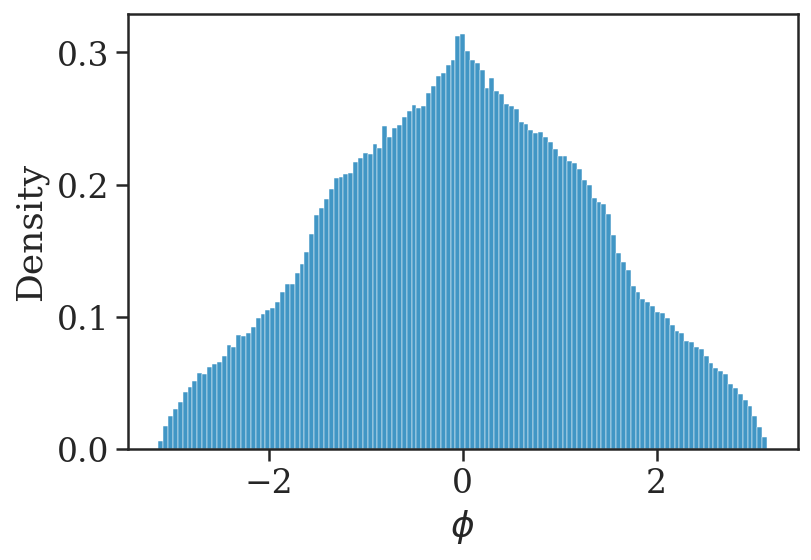

In [59]:
N = 500000
Ap = random.uniform(0, 1, N)
Ac = random.uniform(0, 1, N)
phip = random.uniform(0, 2*pi, N)
phic = random.uniform(0, 2*pi, N)
# phip = arcsin(random.uniform(-1, 1, N))
# phic = arcsin(random.uniform(-1, 1, N))

A = (sqrt(Ac**2 + Ap**2 - 2*Ac*Ap*sin(phic - phip)) + sqrt(Ac**2 + Ap**2 + 2*Ac*Ap*sin(phic - phip)))/2.

e = (1/sin(phic - phip))*(Ac**2 + Ap**2 - sqrt(Ac**2 + Ap**2 - 2*Ac*Ap*sin(phic - phip))*sqrt(Ac**2 + Ap**2 + 2*Ac*Ap*sin(phic - phip)))/(2.*Ac*Ap)

th = (-arctan2(-Ac*cos(phic) - Ap*sin(phip), Ap*cos(phip) - Ac*sin(phic)) - arctan2(-Ac*cos(phic) + Ap*sin(phip), Ap*cos(phip) + Ac*sin(phic)))/2.

phi = (-arctan2(-Ac*cos(phic) - Ap*sin(phip), Ap*cos(phip) - Ac*sin(phic)) + arctan2(-Ac*cos(phic) + Ap*sin(phip), Ap*cos(phip) + Ac*sin(phic)))/2.

cos2th2 = (-Ac**2 + Ap**2)**2/(Ac**4 + Ap**4 + 2*Ac**2*Ap**2*cos(2*phic - 2*phip))

sns.histplot(e[(A < 1)], stat='density')
xlabel(r'$\epsilon$')
savefig('jac_Aellip_Aphi_epsilon.pdf', bbox_inches='tight')

figure();
sns.histplot(e[(A<1) & (cos2th2 < 0.01)], stat='density')
plot([],[])
es = linspace(-0.999, 0.999, 100)
plot(es, jac_e_ApAc(es), label=r'$\propto 1-\epsilon^2$')
legend();
xlabel(r'$\epsilon$')
figure();

Amax = 1
sns.histplot(A[A<Amax], stat='density')
plot([],[])
As = linspace(0, Amax, 50)
plot(As, jac_A_ApAc(As, ), label=r'$\propto A$')
xlabel(r'$A$');
legend();
savefig('jac_Aellip_Aphi_A.pdf', bbox_inches='tight')

figure()
sns.distplot(cos2th2[A<Amax])
sns.distplot(cos(2*th[A<Amax])**2)
xlabel(r'$\cos^2 (2\theta)$');
figure()

# sns.histplot(0.5*arccos(sqrt(cos2th2[A<Amax])), stat='density', binrange=(0,pi/4))
sns.histplot(th[A<Amax], stat='density')
xlabel(r'$\theta$');
savefig('jac_Aellip_Aphi_theta.pdf', bbox_inches='tight')

figure()
sns.histplot(phi[A<Amax], stat='density')
# sns.distplot(phi[A<Amax])
xlabel(r'$\phi$');
savefig('jac_Aellip_Aphi_phi.pdf', bbox_inches='tight')

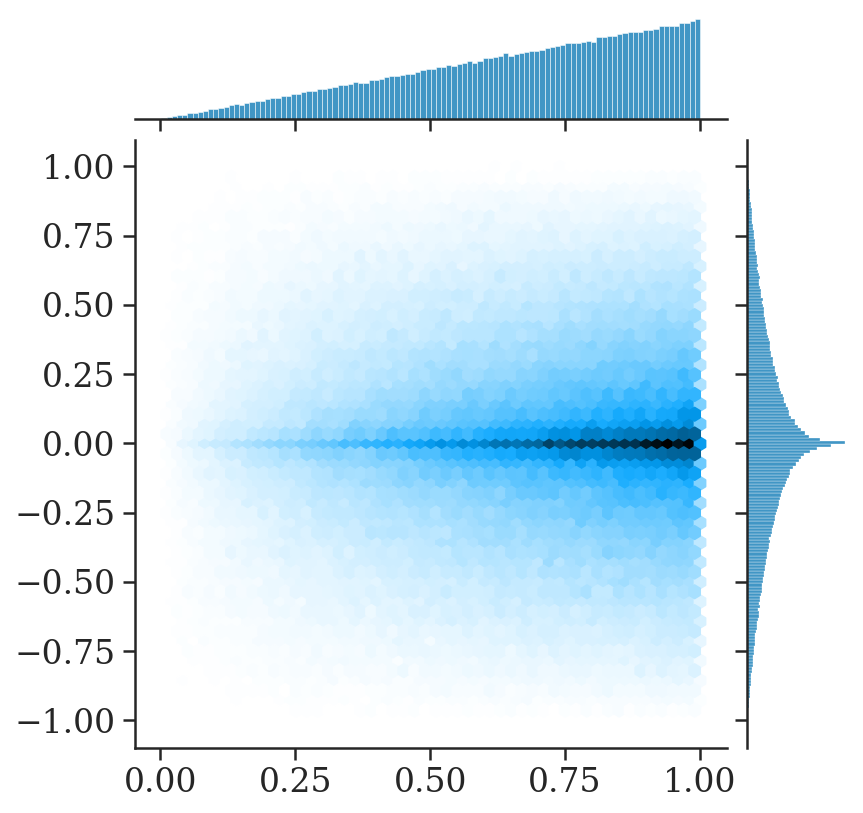

In [63]:
sns.jointplot(A[A<1], e[A<1], kind='hex')

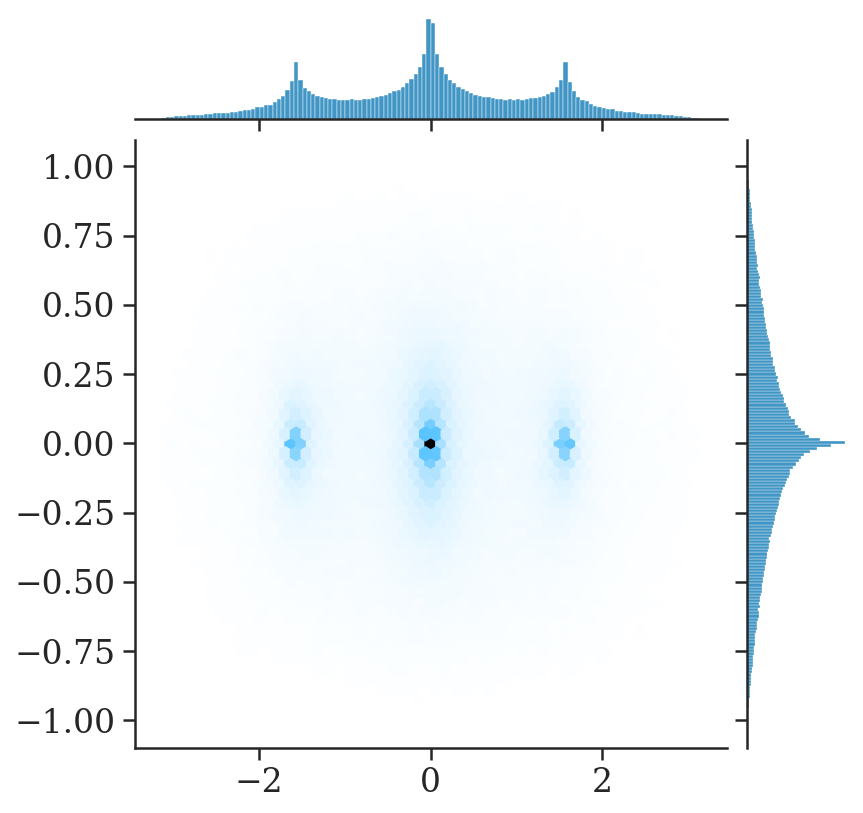

In [69]:
sns.jointplot(th[A<1],e[A<1], kind='hex')

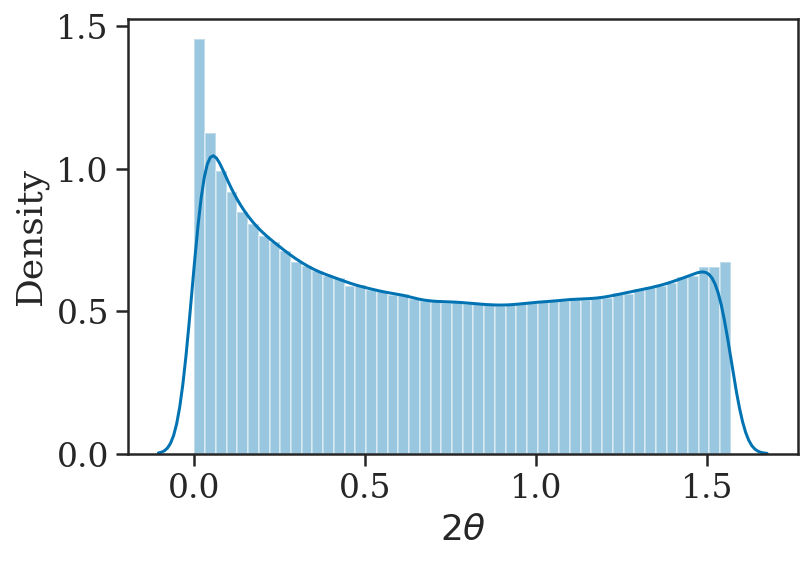

In [58]:
sns.distplot(arccos(sqrt(cos2th2)))
xlabel(r'$2\theta$');

Text(0.5, 0, '$\\cos 2\\theta$')

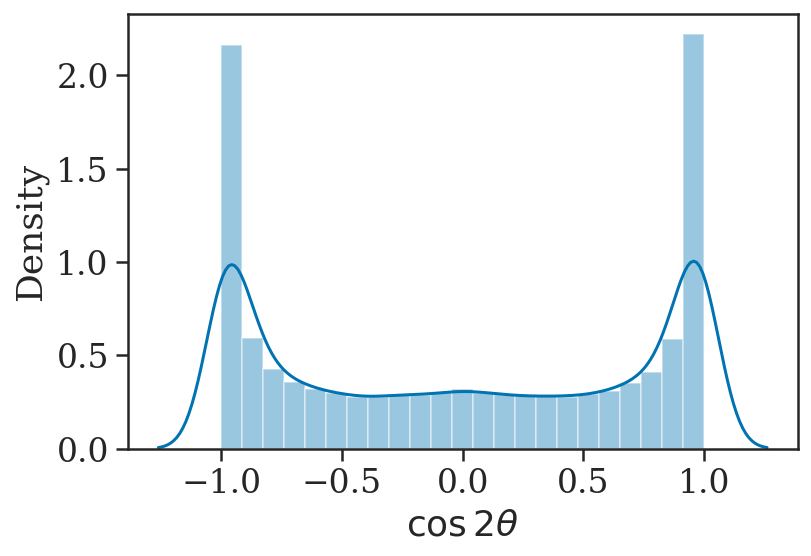

In [13]:
cos2th = (-Ac**2 + Ap**2)/sqrt(Ac**4 + Ap**4 + 2*Ac**2*Ap**2*cos(2*phic - 2*phip))
sns.distplot(cos2th)
xlabel(r'$\cos 2\theta$')

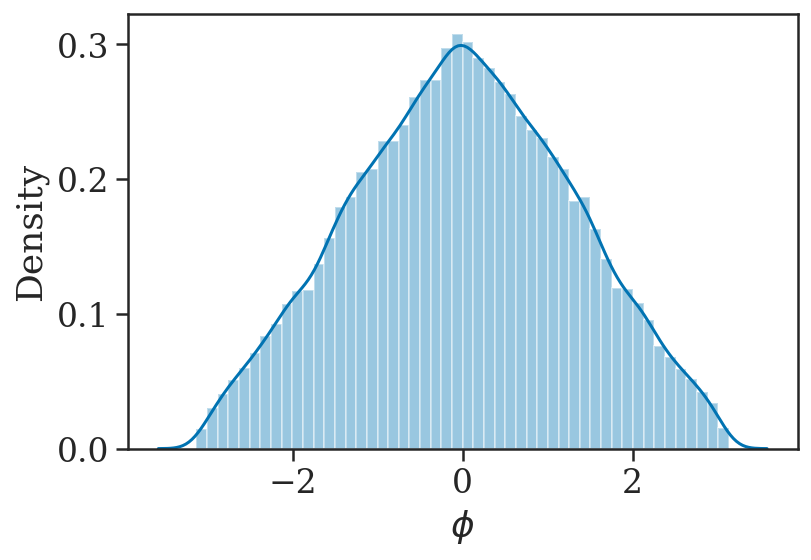

In [14]:
phi = (-arctan2(-Ac*cos(phic) - Ap*sin(phip), Ap*cos(phip) - Ac*sin(phic)) + arctan2(-(Ac*cos(phic)) + Ap*sin(phip), Ap*cos(phip) + Ac*sin(phic)))/2.

sns.distplot(phi)
xlabel(r'$\phi$');

/var/folders/w6/_4dty3r148b5hwmmgykz3_d00001sb/T/ipykernel_83175/729959301.py:4: RuntimeWarning: divide by zero encountered in true_divide
  j = 1/ (-(1 + cosi**2)**2/(2*(-1 + cosi**2)))


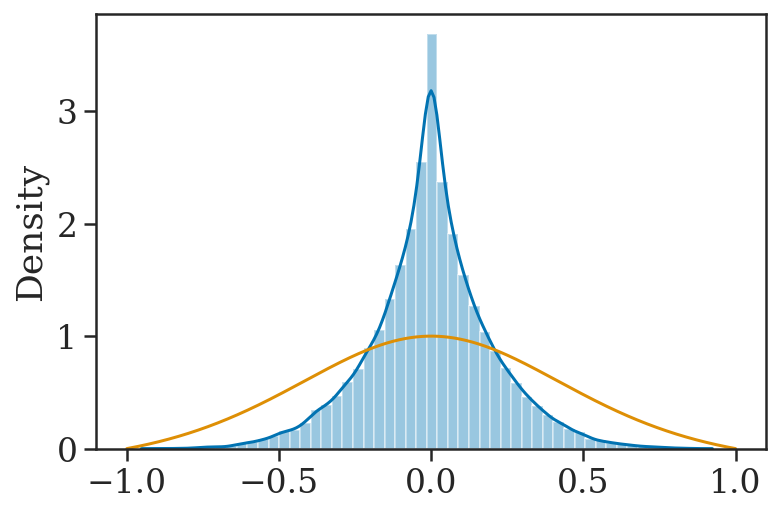

In [15]:
cosi = (-1 + sqrt(1 - e**2))/e

def jac_cosi(cosi):
    j = 1/ (-(1 + cosi**2)**2/(2*(-1 + cosi**2)))
    return j/ trapz(j, cosi)

cis = linspace(-1, 1, 1000)
sns.distplot(cosi[A<Amax])
plot(cis, jac_cosi(cis))

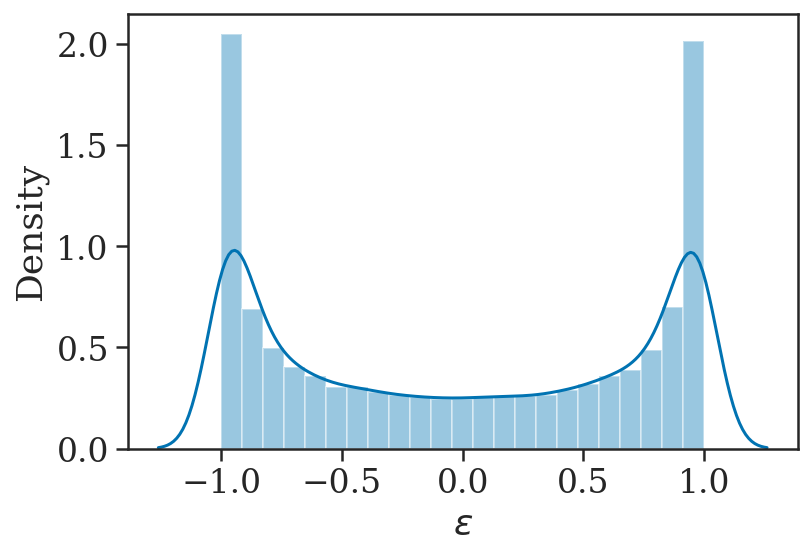

In [16]:
cosi = random.uniform(-1, 1, N)
sns.distplot(2*cosi/(1+ cosi**2))
xlabel(r'$\epsilon$');

## Circular polarizations

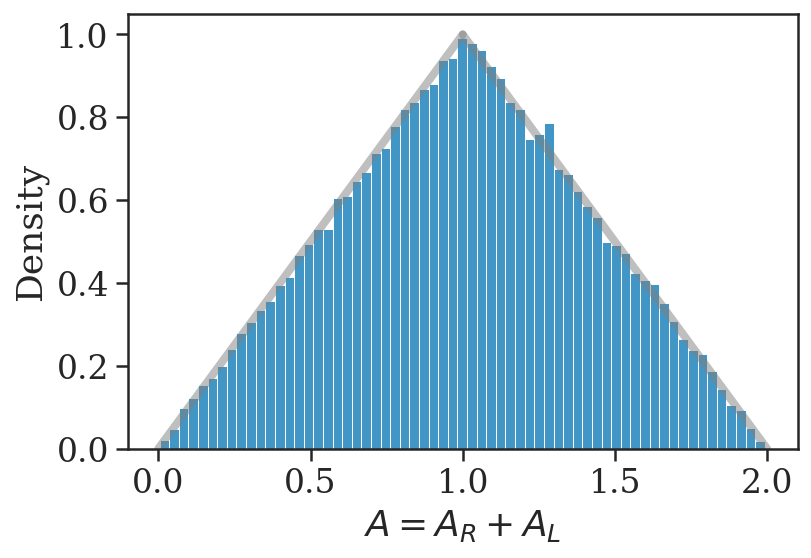

In [17]:
cL = random.uniform(0, 1, 50000)
cR = random.uniform(0, 1, 50000)
a = cL + cR

sns.histplot(a, stat='density')
x = linspace(0, 1, 100)
plot(x, x, lw=4, c='gray', alpha=0.5)
plot(x+1, 1-x, lw=4, c='gray', alpha=0.5)

xlabel(r'$A = A_R + A_L$');
savefig('jac_Aellip_RL.pdf', bbox_inches='tight')